In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
import os

FULL_DATASET_PATH = os.path.join("datasets", "mushrooms", "mushrooms.csv")

In [3]:
full_dataset = pd.read_csv(FULL_DATASET_PATH)

In [4]:
full_dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
full_dataset.groupby("class").count()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,,,,,,,,,,,,,,,,,,,,,
e,4208,4208,4208,4208,4208,4208,4208,4208,4208,4208,...,4208,4208,4208,4208,4208,4208,4208,4208,4208,4208
p,3916,3916,3916,3916,3916,3916,3916,3916,3916,3916,...,3916,3916,3916,3916,3916,3916,3916,3916,3916,3916


In [6]:
full_dataset.get("class").unique()

array(['p', 'e'], dtype=object)

In [7]:
relations = []

capt_shape_to_class_relation = full_dataset.get(
    ["class", "cap-shape"]
).where(full_dataset["class"] == "e").groupby("cap-shape").count()

relations.append(capt_shape_to_class_relation)

In [8]:
%load_ext autoreload
%autoreload 2

from mllib.plot.class_relations import visualize_relations

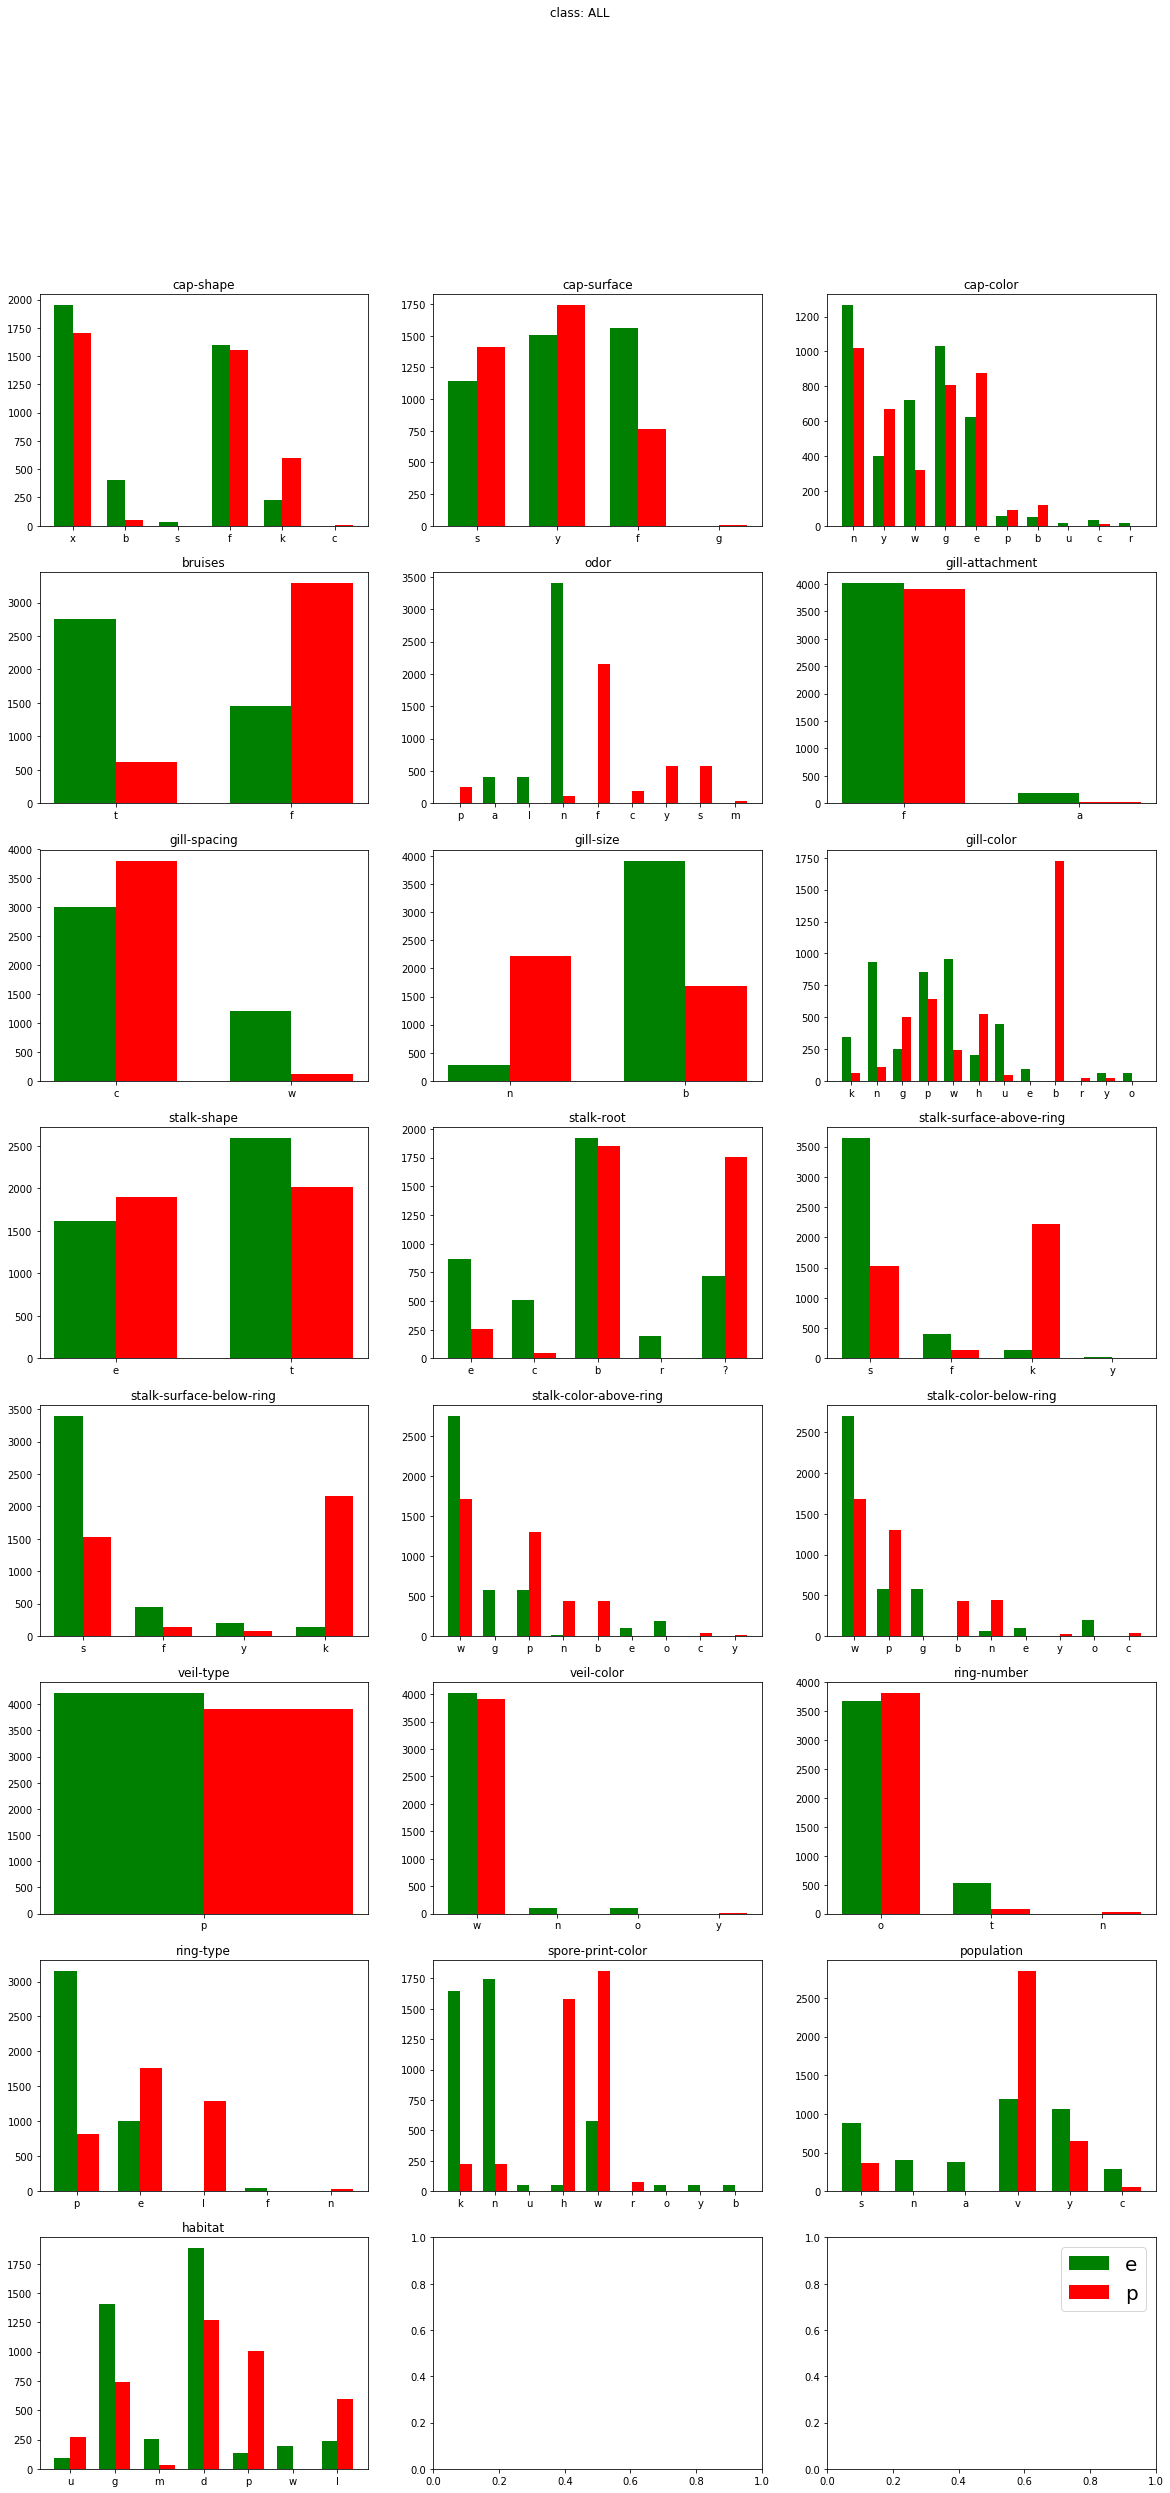

In [9]:
visualize_relations(full_dataset, "class", colors=dict(e="g", p="r"))

In [10]:
full_dataset.get(["class","veil-type"]).groupby(["class","veil-type"]).size()

class  veil-type
e      p            4208
p      p            3916
dtype: int64

In [11]:
full_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [12]:
full_dataset.replace(["e","p"], [0, 1], inplace=True)

In [13]:
from sklearn.model_selection import train_test_split

full_y = full_dataset["class"].copy()
full_dataset.drop("class", axis=1, inplace=True)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(full_dataset, full_y, test_size=0.20, random_state=42)

In [15]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import make_pipeline

full_pipe = make_pipeline(DictVectorizer())


X_train_transformed = full_pipe.fit_transform(X_train.to_dict("records"))

In [25]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

sgd_cls = SGDClassifier()
# lgr_cls = LogisticRegression()

sgd_cls.fit(X_train_transformed, y_train)
# lgr_cls.fit(X_train_transformed, y_train)

c:\users\yithi_000\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [26]:
y_train_pred = sgd_cls.predict(X_train_transformed)

In [27]:
from sklearn.metrics import precision_score, recall_score

print("Precision: {:.2f}%".format(100 * precision_score(y_train, y_train_pred)))
print("Recall: {:.2f}%".format(100 * recall_score(y_train, y_train_pred)))

Precision: 100.00%
Recall: 100.00%


In [35]:
X_test_transformed = full_pipe.transform(X_test.to_dict("records"))

y_test_pred = sgd_cls.predict(X_test_transformed)

y_test_pred

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [29]:
print("Precision: {:.2f}%".format(100 * precision_score(y_test, y_test_pred)))
print("Recall: {:.2f}%".format(100 * recall_score(y_test, y_test_pred)))

Precision: 100.00%
Recall: 100.00%


In [30]:
t = X_test.copy()

In [36]:
t['class_real'] = pd.Series(y_test, index=t.index)
t['class_pred'] = pd.Series(y_test_pred, index=t.index)

In [38]:
t.head(200)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class_real,class_pred
1971,f,f,n,f,n,f,w,b,h,t,...,w,1,w,o,0,n,s,g,0,0
6654,f,s,0,f,y,f,c,n,b,t,...,1,1,w,o,0,w,v,l,1,1
5606,x,y,n,f,f,f,c,n,b,t,...,1,1,w,o,0,w,v,l,1,1
3332,f,y,g,t,n,f,c,b,n,t,...,1,1,w,o,1,n,y,d,0,0
6988,f,s,0,f,s,f,c,n,b,t,...,1,1,w,o,0,w,v,l,1,1
5761,x,y,n,f,y,f,c,n,b,t,...,1,1,w,o,0,w,v,l,1,1
5798,x,s,g,t,f,f,c,b,h,t,...,w,1,w,o,1,h,s,u,1,1
3064,x,y,y,f,f,f,c,b,g,0,...,b,1,w,o,l,h,y,1,1,1
1811,f,f,n,t,n,f,c,b,n,t,...,w,1,w,o,1,k,v,d,0,0
3422,f,y,n,t,n,f,c,b,n,t,...,w,1,w,o,1,k,y,d,0,0
